In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

#To show this as svg images
%config InlineBackend.figure_format = 'svg'

In [2]:
options = {
    'model': 'cfg/tiny-yolo-voc-1c.cfg',
    'load': 1000,                            
    'threshold': 0.1,                       
                            
}

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-1c.cfg
Loading None ...
Finished in 0.00020122528076171875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 

In [8]:

# read the color image and covert to RGB

img = cv2.imread('new_model_data/images/2.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# use YOLO to predict the image
result = tfnet.return_predict(img)

img.shape

(800, 1200, 3)

In [9]:
result

[{'label': 'flappybird',
  'confidence': 0.20678152,
  'topleft': {'x': 330, 'y': 182},
  'bottomright': {'x': 447, 'y': 274}}]

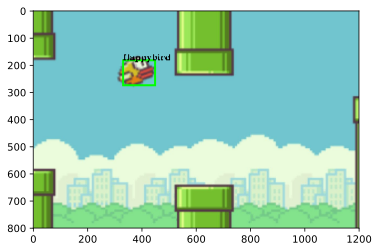

In [10]:

# pull out some info from the results

tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']


# add the box and label and display it
img = cv2.rectangle(img, tl, br, (0, 255, 0), 7) # draw a ractangle onto an image
img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2) # add laebl name
plt.imshow(img)
plt.show()

In [7]:
import numpy as np
import time

In [14]:
capture = cv2.VideoCapture('test_flappybird_video.mp4')
colors = [tuple(255 * np.random.rand(3)) for i in range(10)]

In [15]:
while (capture.isOpened()):
    stime = time.time()
    ret, frame = capture.read()# ret is a boolean. True when the video is playing.
    if ret:
        results = tfnet.return_predict(frame)
        for color, result in zip(colors, results):
            tl = (result['topleft']['x'], result['topleft']['y'])
            br = (result['bottomright']['x'], result['bottomright']['y'])
            label = result['label']
            frame = cv2.rectangle(frame, tl, br, color, 7)
            frame = cv2.putText(frame, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
        cv2.imshow('frame', frame)
        print('FPS {:.1f}'.format(1 / (time.time() - stime)))
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        capture.release()
        cv2.destroyAllWindows()
        break

FPS 7.5
FPS 8.7
FPS 8.0
FPS 8.4
FPS 8.1
FPS 10.0
FPS 9.3
FPS 9.7
FPS 8.9
FPS 9.7
FPS 9.1
FPS 9.7
FPS 9.8
FPS 9.4
FPS 9.7
FPS 9.8
FPS 8.9
FPS 8.9
FPS 8.0
FPS 8.1
FPS 9.1
FPS 9.7
FPS 9.1
FPS 9.5
FPS 9.3
FPS 9.6
FPS 8.5
FPS 9.6
FPS 9.0
FPS 9.6
FPS 9.1
FPS 10.0
FPS 10.7
FPS 9.3
FPS 9.4
FPS 9.6
FPS 10.0
FPS 9.4
FPS 9.9
FPS 9.8
FPS 10.0
FPS 9.7
FPS 9.4
FPS 9.7
FPS 9.1
FPS 9.4
FPS 10.0
FPS 9.7
FPS 9.5
FPS 9.2
FPS 8.9
FPS 10.0
FPS 10.2
FPS 9.5
FPS 10.1
FPS 9.8
FPS 9.8
FPS 9.5
FPS 9.4
FPS 9.8
FPS 10.1
FPS 9.9
FPS 9.5
FPS 10.0
FPS 9.7
FPS 10.0
FPS 10.1
FPS 9.7
FPS 9.0
FPS 9.6
FPS 9.7
FPS 9.6
FPS 9.9
FPS 9.8
FPS 10.2
FPS 9.3
FPS 9.5
FPS 9.3
FPS 8.9
FPS 9.4
FPS 9.1
FPS 9.8
FPS 9.8
FPS 9.8
FPS 9.2
FPS 9.3
FPS 9.3
FPS 9.8
FPS 9.5
FPS 9.8
FPS 9.2
FPS 10.0
FPS 9.8
FPS 9.8
FPS 9.0
FPS 9.9
FPS 8.8
FPS 9.4
FPS 9.0
FPS 9.7
FPS 9.4
FPS 9.6
FPS 9.6
FPS 8.9
FPS 9.3
FPS 10.0
FPS 10.3
FPS 8.5
FPS 8.3
FPS 10.0
FPS 10.0
FPS 9.7
FPS 9.6
FPS 9.8
FPS 9.7
FPS 10.4
FPS 10.4
FPS 9.6
FPS 10.2
FPS 10.2
FPS 9.8
FPS 9.9
F